In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
G:\ANACONDA\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
G:\ANACONDA\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
G:\ANACONDA\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
G:\ANACONDA\envs\Tensorflow\lib\site-packages\tensorflow\python\framewo

### 写一个LossHistory类，保存loss和acc

In [2]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
        
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
        
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [3]:
batch_size = 128 
nb_classes = 10
nb_epoch = 20 

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("G:\\ANACONDA\\envs\\Tensorflow\\MNIST_data", one_hot=True)
 
X_train, y_train = mnist.train.images,mnist.train.labels
X_test, y_test = mnist.test.images, mnist.test.labels
X_var,y_var= mnist.validation.images, mnist.validation.labels
X_train = X_train.reshape(55000, 784)
X_var=X_var.reshape(5000,784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255  ### 归一化到0~1
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_var.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting G:\ANACONDA\envs\Tensorflow\MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting G:\ANACONDA\envs\Tensorflow\MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting G:\ANACONDA\envs\Tensorflow\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting G:\ANACONDA\envs\Tensorflow\MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
55000 train samples
5000 validation samples
10000 test samples


In [4]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [7]:
### 用类创建一个实例history
history = LossHistory()

In [8]:
model.fit(X_train, y_train,
            batch_size=batch_size, nb_epoch=nb_epoch,
            verbose=1, 
            validation_data=(X_var, y_var),
            callbacks=[history]) ## 这个地方要加入callbacks

G:\ANACONDA\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 9s 158us/step - loss: 0.9052 - acc: 0.7208 - val_loss: 3.8466 - val_acc: 0.7542
Epoch 2/20
55000/55000 [==============================] - 8s 145us/step - loss: 0.3886 - acc: 0.8850 - val_loss: 2.3031 - val_acc: 0.8526
Epoch 3/20
55000/55000 [==============================] - 8s 144us/step - loss: 0.3002 - acc: 0.9098 - val_loss: 1.9278 - val_acc: 0.8768
Epoch 4/20
55000/55000 [==============================] - 8s 151us/step - loss: 0.2418 - acc: 0.9271 - val_loss: 1.4628 - val_acc: 0.9064
Epoch 5/20
55000/55000 [==============================] - 8s 143us/step - loss: 0.2033 - acc: 0.9384 - val_loss: 0.9132 - val_acc: 0.9418
Epoch 6/20
55000/55000 [==============================] - 8s 147us/step - loss: 0.1741 - acc: 0.9472 - val_loss: 0.8533 - val_acc: 0.9462
Epoch 7/20
55000/55000 [==============================] - 7s 136us/step - loss: 0.1500 - acc: 0.9557 - val_loss: 0.7394 - v

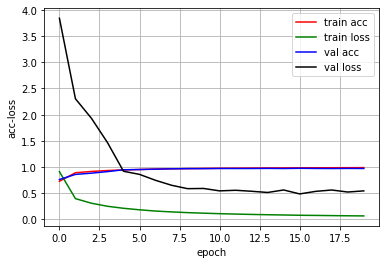

In [9]:
history.loss_plot('epoch') ## 调用类函数